<a href="https://colab.research.google.com/github/walunjab09/Time-series-forecasting/blob/main/LSTM_Univariate_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# univariate lstm example
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [2]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [3]:
# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [4]:
print(X),print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


(None, None)

In [5]:
# Reshaping input data to 3 dimensions as required by LSTM
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [6]:
# Building LSTM model

model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=1)

Epoch 1/300
1/1 [==============================] - 3s 3s/step - loss: 32885.0000
Epoch 2/300
1/1 [==============================] - 0s 15ms/step - loss: 32620.6641
Epoch 3/300
1/1 [==============================] - 0s 13ms/step - loss: 32357.2520
Epoch 4/300
1/1 [==============================] - 0s 15ms/step - loss: 32087.0215
Epoch 5/300
1/1 [==============================] - 0s 17ms/step - loss: 31809.0391
Epoch 6/300
1/1 [==============================] - 0s 13ms/step - loss: 31529.8438
Epoch 7/300
1/1 [==============================] - 0s 13ms/step - loss: 31261.1270
Epoch 8/300
1/1 [==============================] - 0s 15ms/step - loss: 30954.4473
Epoch 9/300
1/1 [==============================] - 0s 22ms/step - loss: 30605.9941
Epoch 10/300
1/1 [==============================] - 0s 14ms/step - loss: 30218.6660
Epoch 11/300
1/1 [==============================] - 0s 13ms/step - loss: 29804.5176
Epoch 12/300
1/1 [==============================] - 0s 17ms/step - loss: 29378.3535
Epo

In [9]:
# Predicting data for next 10 days

# demonstrate prediction for next 10 days
x_input = np.array([187, 196, 210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[224.2192]
1 day input [196.        210.        224.2191925]
1 day output [[235.42784]]
2 day input [210.         224.2191925  235.42784119]
2 day output [[249.47867]]
3 day input [224.2192  235.42784 249.47867]
3 day output [[263.33798]]
4 day input [235.42784 249.47867 263.33798]
4 day output [[276.3947]]
5 day input [249.47867 263.33798 276.3947 ]
5 day output [[291.12057]]
6 day input [263.33798 276.3947  291.12057]
6 day output [[305.8442]]
7 day input [276.3947  291.12057 305.8442 ]
7 day output [[320.70776]]
8 day input [291.12057 305.8442  320.70776]
8 day output [[336.67688]]
9 day input [305.8442  320.70776 336.67688]
9 day output [[352.92645]]
[224.2192, 235.42784, 249.47867, 263.33798, 276.3947, 291.12057, 305.8442, 320.70776, 336.67688, 352.92645]


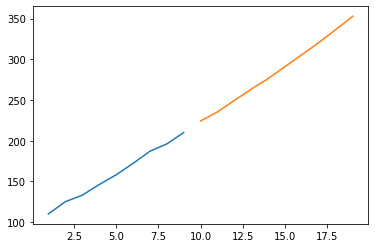

In [10]:
# Visualizing the output

import matplotlib.pyplot as plt

day_new=np.arange(1,10)
day_pred=np.arange(10,20)

plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)